# EXPLORING GLOBAL TERRORISM

Database source: http://www.rand.org/nsrd/projects/terrorism-incidents/download.html

RAND Corporation is a well-known American thinktank focused on international military affairs

RAND began this database in 1980 after forming the Cabinet Committee to Combat Terrorism in 1972

RAND uses the common academic definition of terrorism, agreed upon by policymakers and military officials

From RAND's website:

*Terrorism is defined by the nature of the act, not by the identity of the perpetrators or the nature of the cause; key elements include:*

>-*Violence or the threat of violence*

>-*Calculated to create fear and alarm*

>-*Intended to coerce certain actions*

>-*Motive must include a political objective*

>-*Generally directed against civilian targets*

>-*Can be a group or an individual*

## Panda time

In [1]:
import pandas as pd
%matplotlib inline

### Overview of the database

In [2]:
globalterror = pd.read_csv('RAND_Database_of_Worldwide_Terrorism_Incidents.csv')
globalterror #global terror is df

,Date,City,Country,Perpetrator,Weapon,Injuries,Fatalities,Description
0,9-Feb-68,Buenos Aires,Argentina,Unknown,Firearms,0,0,ARGENTINA. The second floor of the U.S. embas...
1,12-Feb-68,Santo Domingo,Dominican Republic,Unknown,Explosives,0,0,DOMINICAN REPUBLIC. A homemade bomb was found...
2,13-Feb-68,Montevideo,Uruguay,Unknown,Fire or Firebomb,0,0,URUGUAY. A Molotov cocktail was thrown outsid...
3,20-Feb-68,Santiago,Chile,Unknown,Explosives,0,0,CHILE. An explosion from a single stick of dy...
4,21-Feb-68,"Washington, D.C.",United States,Unknown,Explosives,0,0,UNITED STATES. The Soviet embassy was bombed ...
5,21-Feb-68,Neot Hakikar,Israel,Unknown,Unknown,0,0,ISRAEL. Palestinian terrorists damaged a pipe...
6,22-Feb-68,Quito,Ecuador,Unknown,Explosives,0,0,ECUADOR. A bomb exploded in the Quito Binatio...
7,24-Feb-68,Masada,Israel,Other,Explosives,0,0,ISRAEL. Palestinian terrorists fired five mor...
8,5-Mar-68,Riohacha,Colombia,National Liberation Army of Colombia (ELN),Unknown,0,0,COLOMBIA. Three members of the Ejercito de Li...
9,8-Mar-68,Rosario,Argentina,Frente de Liberacion Nacional del Vietnam del Sur,Firearms,0,0,ARGENTINA. The USIS office in Rosario was mac...


In [3]:
globalterror.describe()

,Injuries,Fatalities
count,40129.000000,40129.000000
mean,3.647362,1.600738
std,42.589433,15.750102
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,5000.000000,2749.000000


### Data cleaning

In [9]:
from datetime import datetime, timedelta
from cStringIO import StringIO
globalterror["Date"].apply(lambda s : (s.year,s.month,s.day) ) #to turn dataframe into a datetime object

0      (1968, 2, 9)
1     (1968, 2, 12)
2     (1968, 2, 13)
3     (1968, 2, 20)
4     (1968, 2, 21)
5     (1968, 2, 21)
6     (1968, 2, 22)
7     (1968, 2, 24)
8      (1968, 3, 5)
9      (1968, 3, 8)
10    (1968, 3, 12)
11    (1968, 3, 12)
12    (1968, 3, 15)
13    (1968, 3, 16)
14    (1968, 3, 18)
...
40114     (2009, 12, 8)
40115     (2009, 12, 8)
40116    (2009, 12, 12)
40117    (2009, 12, 13)
40118    (2009, 12, 15)
40119    (2009, 12, 15)
40120    (2009, 12, 16)
40121    (2009, 12, 17)
40122    (2009, 12, 18)
40123    (2009, 12, 21)
40124    (2009, 12, 25)
40125    (2009, 12, 27)
40126    (2009, 12, 28)
40127    (2009, 12, 30)
40128    (2009, 12, 31)
Name: Date, Length: 40129, dtype: object

In [10]:
globalterror.dtypes
#Date is an object, but needs to be an integer in order to be recognized as an actual date

Date           datetime64[ns]
City                   object
Country                object
Perpetrator            object
Weapon                 object
Injuries                int64
Fatalities              int64
Description            object
year                    int32
dtype: object

In [11]:
globalterror['Date'] = pd.to_datetime(globalterror['Date'], coerce=True) # parse the different formats flexibly
globalterror['Date'].values.astype('datetime64[Y]') # isolate the year
globalterror['year'] =  pd.DatetimeIndex(globalterror['Date']).year #turn years into integers
globalterror['year']

0     1968
1     1968
2     1968
3     1968
4     1968
5     1968
6     1968
7     1968
8     1968
9     1968
10    1968
11    1968
12    1968
13    1968
14    1968
...
40114    2009
40115    2009
40116    2009
40117    2009
40118    2009
40119    2009
40120    2009
40121    2009
40122    2009
40123    2009
40124    2009
40125    2009
40126    2009
40127    2009
40128    2009
Name: year, Length: 40129, dtype: int32

In [12]:
#alternate method:
year_grouped = globalterror.groupby(lambda x: globalterror['Date'][x].year)

### Now that the date column has been cleaned, we can plot it!

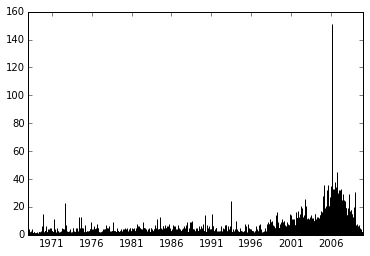

In [13]:
import matplotlib.pyplot as plt
import numpy as np

counts = globalterror['Date'].value_counts(sort=False)
plt.bar(counts.index,counts)
plt.show()

### Let's look at that spike more closely...

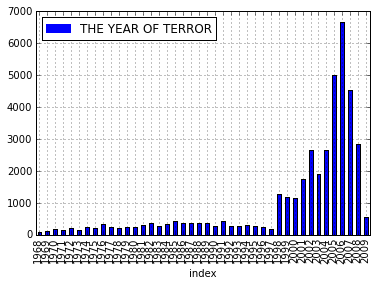

In [14]:
globalterror["year"].value_counts().reset_index().sort("index").plot("index",0,kind = "bar")

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

patch = mpatches.Patch(color='blue', label='THE YEAR OF TERROR')
plt.legend(handles=[patch], loc='upper left')

plt.show()

### What were the terrorist attacks that happened in this "year of terror"? Was the violence really terrorism or part of a civil war?

In [15]:
year2006 = globalterror[globalterror['year']==2006]
year2006

,Date,City,Country,Perpetrator,Weapon,Injuries,Fatalities,Description,year
25537,2006-01-01,Baghdad,Iraq,Unknown,Explosives,0,0,A bomb was detonated near the Dora refinery in...,2006
25538,2006-01-01,Baghdad,Iraq,Unknown,Explosives,0,0,A explosive device detonated near a restaurant...,2006
25539,2006-01-01,Baghdad,Iraq,Unknown,Explosives,0,0,A explosive device detonated near a resturant ...,2006
25540,2006-01-01,Baghdad,Iraq,Unknown,Explosives,0,0,An explosive device detonated near a police pa...,2006
25541,2006-01-01,Baghdad,Iraq,Unknown,Explosives,0,0,An explosive device detonated near a police pa...,2006
25542,2006-01-01,Mosul,Iraq,Unknown,Firearms,3,1,"Gunmen attacked a police checkpoint in Mosul, ...",2006
25543,2006-01-01,Baghdad,Iraq,Unknown,Explosives,2,0,A bomb exploded near a police patrol in Baghda...,2006
25544,2006-01-01,Baghdad,Iraq,Unknown,Explosives,0,0,A car bomb exploded near a movie theater in Ba...,2006
25545,2006-01-01,Baghdad,Iraq,Unknown,Explosives,1,0,A suicide car bomber drove his vehicle into a ...,2006
25546,2006-01-01,Baghdad,Iraq,Unknown,Firearms,6,2,Gunmen opened fire on a group of worshippers o...,2006


### What are the most popular weapons used by terrorists?

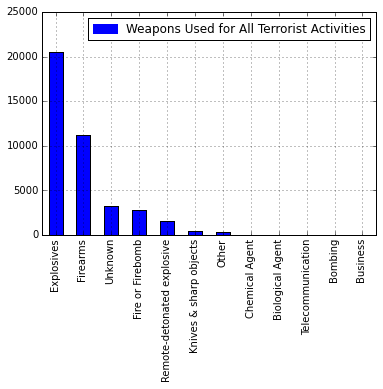

In [16]:
globalterror['Weapon'].value_counts().plot(kind = "bar") #weapons used for terrorist activities

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

blue_patch = mpatches.Patch(color='blue', label='Weapons Used for All Terrorist Activities')
plt.legend(handles=[blue_patch])

plt.show()

In [17]:
from IPython.display import HTML
HTML('<iframe width="100%" height="520" frameborder="0" src="https://alizajanegoldberg.cartodb.com/viz/67073e8c-4a9f-11e5-bd55-0e018d66dc29/embed_map" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>') #map of terrorist incidents color-coded by weapon used

### How deadly are these weapons used by terrorists?

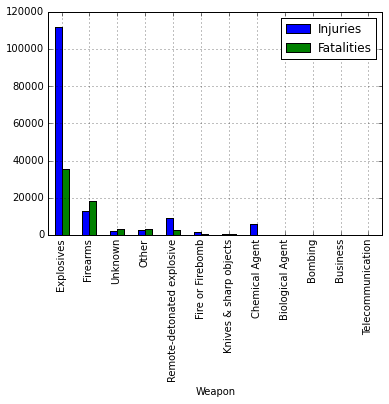

In [18]:
globalterror.groupby(by='Weapon').sum()[["Injuries","Fatalities"]].sort("Fatalities", ascending=False).plot(kind="bar")
#measurement of the harm done by these weapons used for terrorist activities

### Which attacks had the most fatalities?

In [19]:
most_fatalities = globalterror.groupby('Date').mean()['Fatalities']
globalterror.sort('Fatalities', ascending=False).head(10)

,Date,City,Country,Perpetrator,Weapon,Injuries,Fatalities,Description,year
12718,2001-09-11,New York City,United States,Al Qaeda,Other,2261,2749,Hijacked American Airlines Flight 11 from Bost...,2001
35403,2007-08-14,Sinjar,Iraq,Unknown,Explosives,1500,500,Four truck bombs hit a poor rural area near th...,2007
8062,1998-01-11,NaN,Algeria,Armed Islamic Group (GIA),Firearms,0,400,A group of 100 armed men opened fire on civili...,1998
19357,2004-09-01,Beslan,Russia,Riyad us-Saliheyn Martyrs' Brigade,Firearms,727,331,A group of thirty to thirty-five (sources vari...,2004
4060,1985-06-23,Montreal,Canada,Other,Explosives,0,329,CANADA. An Air-India Boeing 747 en route from...,1985
6796,1993-03-12,Bombay,India,Other,Explosives,1200,317,INDIA. Within three hours in the city of Bomb...,1993
5393,1988-12-21,Lockerbie,United Kingdom,Other,Explosives,12,270,"UNITED KINGDOM. SCOTLAND. Pan Am Flight 103,...",1988
12535,2001-08-11,Luanda,Angola,National Union for the Total Independence of A...,Remote-detonated explosive,165,252,A train carrying refugees was derailed by an e...,2001
3466,1983-10-23,Beirut,Lebanon,Hizballah,Explosives,81,241,LEBANON. The buildings housing the U.S. Marin...,1983
18121,2004-02-21,Lira,Uganda,Lord's Resistance Army (LRA),Fire or Firebomb,60,239,The Lords Resistance Army (LRA) killed more th...,2004


### Where were people killed the most by terrorist attacks?

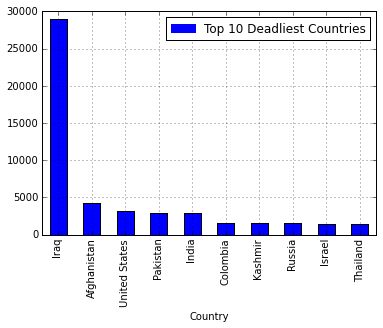

In [20]:
globalterror.groupby("Country").sum().sort("Fatalities",ascending = False).head(10).reset_index().plot(x="Country",y = "Fatalities",kind = "bar")

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

cpatch = mpatches.Patch(color='blue', label='Top 10 Deadliest Countries')
plt.legend(handles=[cpatch])

plt.show()

### Which terrorist groups have attacked the most?

In [21]:
globalterror["Perpetrator"].head()

0    Unknown
1    Unknown
2    Unknown
3    Unknown
4    Unknown
Name: Perpetrator, dtype: object

## Data cleaning part 2: Eliminate the perpetrators labelled unknown or other 

In [22]:
pd.set_option('display.max_rows', 50)

globalterror[ ~ globalterror["Perpetrator"].isin( ["unknown","Unknown", "other", "Other"]) ]

,Date,City,Country,Perpetrator,Weapon,Injuries,Fatalities,Description,year
8,1968-03-05,Riohacha,Colombia,National Liberation Army of Colombia (ELN),Unknown,0,0,COLOMBIA. Three members of the Ejercito de Li...,1968
9,1968-03-08,Rosario,Argentina,Frente de Liberacion Nacional del Vietnam del Sur,Firearms,0,0,ARGENTINA. The USIS office in Rosario was mac...,1968
17,1968-03-18,Elat,Israel,al-Fatah,Explosives,28,2,ISRAEL. A bus carrying schoolchildren from Te...,1968
19,1968-03-19,Miami,United States,Anti-Castro Cubans,Explosives,0,0,UNITED STATES - Unidentified anti-Castro Cuban...,1968
23,1968-04-22,New York City,United States,Anti-Castro Cubans,Explosives,0,0,UNITED STATES. The Mexican mission to the Uni...,1968
24,1968-04-22,New York City,United States,Anti-Castro Cubans,Explosives,0,0,UNITED STATES. The Spanish National Tourist O...,1968
30,1968-05-24,Key West,United States,Anti-Castro Cubans,Explosives,0,0,UNITED STATES. The British cargo ship Granwoo...,1968
31,1968-05-26,Miami,United States,Anti-Castro Cubans,Explosives,0,0,UNITED STATES. The Mexican consul general's r...,1968
32,1968-05-30,Tampa,United States,Anti-Castro Cubans,Explosives,0,0,UNITED STATES. El Poder Cubano was credited w...,1968
33,1968-05-30,New York City,United States,Anti-Castro Cubans,Explosives,0,0,UNITED STATES - El Poder Cubano bombed the Spa...,1968


In [23]:
#alternate method:
globalterror.groupby(globalterror['Perpetrator'])

### What countries have had the most terrorist attacks?

### *This became the central question of the project*

## Cloropleth map delineated by jenks instead of quantiles

In [24]:
HTML('<iframe width="100%" height="520" frameborder="0" src="https://alizajanegoldberg.cartodb.com/viz/dd10ddd6-4a9f-11e5-9b58-0e49835281d6/embed_map" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>')

### What are jenks? From Wikipedia:

>*The Jenks optimization method, also called the Jenks natural breaks classification method, is a data clustering method designed to determine the best arrangement of values into different classes. This is done by seeking to minimize each class’s average deviation from the class mean, while maximizing each class’s deviation from the means of the other groups. In other words, the method seeks to reduce the variance within classes and maximize the variance between classes.*

## Torque map with glowing spots for intensity

### *I had to geocode all the locations, which turned out to be a huge undertaking*

### *I used a Mapquest API key along with a pivot table and some old-fashioned replace all, both in Google Sheets*

### *I imported this code into Google Sheets for geocoding: https://github.com/mapbox/geo-googledocs/blob/master/MapBox.js*

### *QGIS and Socrata did not work very well*

In [25]:
HTML('<iframe width="100%" height="520" frameborder="0" src="https://alizajanegoldberg.cartodb.com/viz/9ef243fc-4c1e-11e5-9487-0e4fddd5de28/embed_map" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>')

## Cumulative torque map with high duration speed to emphasize the acceleration starting around the year 1999

In [26]:
HTML('<iframe width="100%" height="520" frameborder="0" src="https://alizajanegoldberg.cartodb.com/viz/1e7435e4-4c6b-11e5-8211-0e4fddd5de28/embed_map" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>')

## Density map of terrorist activity

In [27]:
HTML('<iframe width="100%" height="520" frameborder="0" src="https://alizajanegoldberg.cartodb.com/viz/113fa51c-4c5b-11e5-b539-0e0c41326911/embed_map" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>')

### Methodology issues:

>-no option for clustered torque maps

>-terrorism is difficult to define, which may skew the data

>-RAND is based out of the USA, so perhaps unreported terrorist attacks from overseas were not included

>-geocoding a map with historical places such as Yugoslavia, USSR, and Czechoslovakia, can lead to errors

## Conclusion:

### "Here's the truth: life is catastrophe" ~Donna Tartt, *The Goldfinch*